# Sesión de ejercicios 4
## Integrantes:
  - Freddy Abad L.
  - Edisson Reinozo T.

La practica se desarrollo en Google Colab, por lo cual , puede preferirse su lectura en esta, mediante el siguiente link: https://colab.research.google.com/drive/1y_h0KxWsQJpL9y-AwScKrij3ozZhckco?usp=sharing 

In [ ]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Esta sesión de ejercicios tiene el objetivo de que el alumno trabaje con datasets reales sin etiquetar para encontrar particiones de datos útiles para un análisis posterior. El alumno utilizará varias técnicas derivadas de la minería de textos y de procesos de minería de datos. Adicionalmente, se pone especial énfasis en el análisis de los resultados. 

## Ejercicio 1

Ejecute y analice el código a continuación.

In [ ]:
# librería necesaria para el dataset
!pip install wikipedia

In [ ]:
import pandas as pd
import wikipedia
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from wordcloud import WordCloud

In [ ]:
# se extraen 9 artículos referentes a los siguientes temas:
articles = ['Data Science','Artificial intelligence',          
            'European Central Bank','Bank','Financial technology','International Monetary Fund',          
            'Basketball','Swimming','Tenni']
wiki_lst = []
title = []

for article in articles:
    print("Cargando contenido: ",article)
    wiki_lst.append(wikipedia.page(article, auto_suggest=True).content)
    title.append(article)


Cargando contenido:  Data Science
Cargando contenido:  Artificial intelligence
Cargando contenido:  European Central Bank
Cargando contenido:  Bank
Cargando contenido:  Financial technology
Cargando contenido:  International Monetary Fund
Cargando contenido:  Basketball
Cargando contenido:  Swimming
Cargando contenido:  Tenni


<br>
Se ejecuta la transformación TFIDF de los documentos extraídos.

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(wiki_lst)

<br>
Se ejecuta el método de KMeans para clustering y se estima el número óptimo de clusters a través del método del codo.

Para este problema, el número de clusters debe ser menor a 9 (número de documentos extraídos).

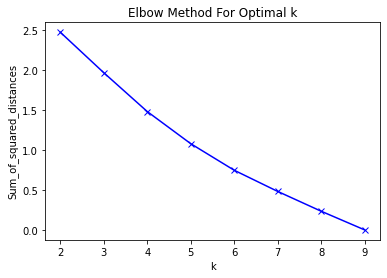

In [ ]:
Sum_of_squared_distances = []
K = range(2,10)
for k in K:
    km = KMeans(n_clusters=k, max_iter=200, n_init=10)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)

plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

<br>
Se escoge arbritrariamente un $k=6$ y se muestra a que cluster pertenece cada documento.

In [ ]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip(title,labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))
# print(wiki_cl)

                         title  cluster
1      Artificial intelligence        0
0                 Data Science        1
2        European Central Bank        2
3                         Bank        2
5  International Monetary Fund        2
4         Financial technology        3
7                     Swimming        4
6                   Basketball        5
8                        Tenni        5


Para mostrar los resultados en términos de términos más importantes en un cluster, se muestra un WordCloud por cada cluster.

Cluster: 0
Titles
 Artificial intelligence


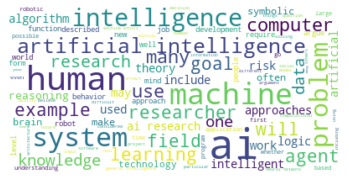

Cluster: 1
Titles
 Data Science


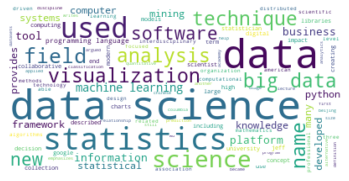

Cluster: 2
Titles
       European Central Bank
                        Bank
 International Monetary Fund


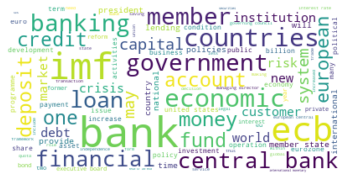

Cluster: 3
Titles
 Financial technology


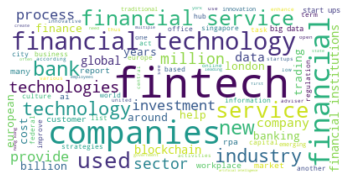

Cluster: 4
Titles
 Swimming


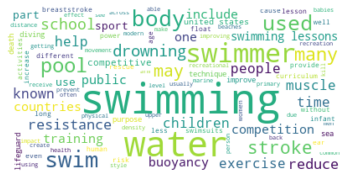

Cluster: 5
Titles
 Basketball
      Tenni


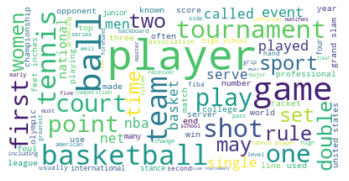

In [ ]:
result={'cluster':labels,'wiki':wiki_lst}
result=pd.DataFrame(result)

for k in range(0,true_k):
    s=result[result.cluster==k]
    text=s['wiki'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    print('Cluster: {}'.format(k))
    print('Titles')
    
    titles=wiki_cl[wiki_cl.cluster==k]['title']
    
    print(titles.to_string(index=False))
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**¿Los clusters hallados tienen sentido?**

Si bien agrupa a los temas, el cluster no muestra una clusterización con una buena precision. Esto se debe a que se corrio deliberadamente k=6, si se analiza el grafico de codo realizado con anterioridad, los modelos con los k distintos no presenta puntos de quiebre, es decir no se puede elegir correctamente un k especifico con una buena metrica. 

Adicionalmente, si se analiza el grafico de Silhoute Score, a continuacion detallado, los valores son por debajo de 0.2, siendo el mejor modelo aquel que se realiza con k=2. Tomando en consideracion, que la grafica de silhouetas mientras mas cercano a 0, indica que los clusters estan en overlapping, mientras que mas cercano a 1, indica que los clusters estan mas separados entre si, pero existe una buena separacion entre los puntos y su centroide. Esto evidencia que la data, quizas necesite de mas preprocesamiento, sin embargo como proceso metodologico fue correctamente realizado.

**Fuente:**

- Scikit Editor, 2020, "Selecting the number of clusters with silhouette analysis on KMeans clustering", Disponible en: 
https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py 


Ejecute el método del `silhouette score` para encontrar el número de clusters más óptimo para este ejercicio. ¿Los resultados varían?

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = [2, 3, 4, 5, 6]
sil_array=[]
for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    sil_array.append(silhouette_avg)

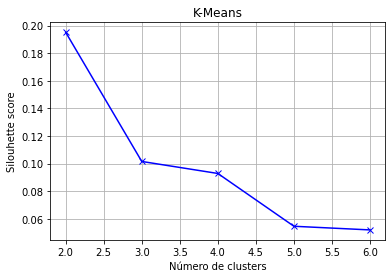

In [ ]:
plt.plot(range_n_clusters, sil_array,'bx-')
plt.xlabel('Número de clusters')
plt.ylabel('Silouhette score')
plt.grid()
plt.title('K-Means')
plt.show()

## Ejercicio 2

Analizar el código a continuación y realizar cada una de las tareas propuestas en el orden planteado.

In [ ]:
from bs4 import BeautifulSoup

Lectura del dataset. Para este ejercicio se utilizará el dataset de la base de datos de películas `IMBD` con información sobre sinopsis de películas, géneros, y títulos.

In [ ]:
titles = open('data/title_list.txt').read().split('\n')
titles =  titles[:100]

genres = open('data/genres_list.txt').read().split('\n')
genres = genres[:100]

synopses_wiki = open('data/synopses_list_wiki.txt', encoding='utf8').read().split('\n BREAKS HERE')
synopses_wiki = synopses_wiki[:100]

synopses_imdb = open('data/synopses_list_imdb.txt').read().split('\n BREAKS HERE')
synopses_imdb = synopses_imdb[:100]

Se realiza un filtrado de caracteres no deseados en el texto.

In [ ]:
synopses_clean_wiki = []
for text in synopses_wiki:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_wiki.append(text)
synopses_wiki = synopses_clean_wiki

synopses_clean_imdb = []
for text in synopses_imdb:
    text = BeautifulSoup(text, 'html.parser').getText()
    synopses_clean_imdb.append(text)
synopses_imdb = synopses_clean_imdb

# las sinopsis del sitio y de la wiki son concatenadas para tener más información por película
synopses = []
for i in range(len(synopses_wiki)):
    item = synopses_wiki[i] + synopses_imdb[i]
    synopses.append(item)

La base de datos consta de información sobre 100 películas (las películas mejor rankeadas de `IMDB`)

In [ ]:
print(str(len(titles)) + ' titles')
print(str(len(genres)) + ' genres')
print(str(len(synopses)) + ' synopses')

100 titles
100 genres
100 synopses



Realice el tokenizado de los términos y posteriormente genere la representación vectorial `tfidf` con unigramas, bigramas, y trigramas. Muestre el tamaño de la matriz resultante.

In [ ]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

def tokenize(text):
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    stopwords_ = stopwords.words('english')
    stopwords_.extend(['plot','edit'])
    en_stop = set(stopwords_)
    tokens = tokenizer.tokenize(text.lower())
    stopped_tokens = [i for i in tokens if i not in en_stop]
    return " ".join(stopped_tokens)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Inserte su código aquí
synopses = [tokenize(synopsy) for synopsy in synopses]
# Generamos el TF-IDF
synopsy_vectorizer = TfidfVectorizer(ngram_range=(1,3))
X = synopsy_vectorizer.fit_transform(synopses)
Y = genres
X.shape


(100, 246574)

In [ ]:
Y = [genre.split(',')[0].replace("u'", "").replace("'", "").replace("[", "").replace("]", "").replace(' ', '') for genre in genres]

Ejecute el proceso de clustering utilizando KMeans. Inicialmente, utilice la métrica del silhouette score ($4 \le k \le 8$) y seleccione el mejor número de particiones para este problema. Muestre un gráfico con la distribución de documentos por cluster.

In [ ]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

Para k= 4, silhouette_score: 0.0007133212761211467
Para k= 5, silhouette_score: 0.0011707283584523017
Para k= 6, silhouette_score: 0.0024722612886542887
Para k= 7, silhouette_score: 0.003193327151969139
Para k= 8, silhouette_score: 0.001764295649496786


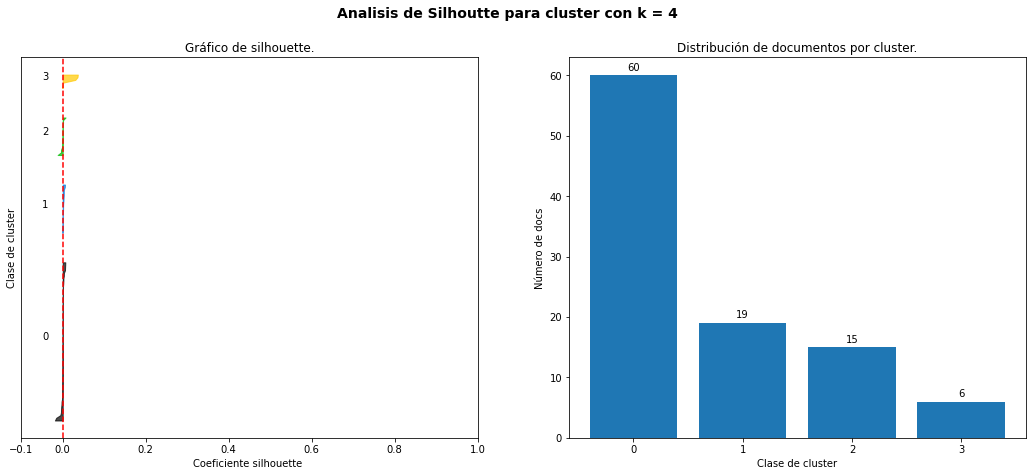

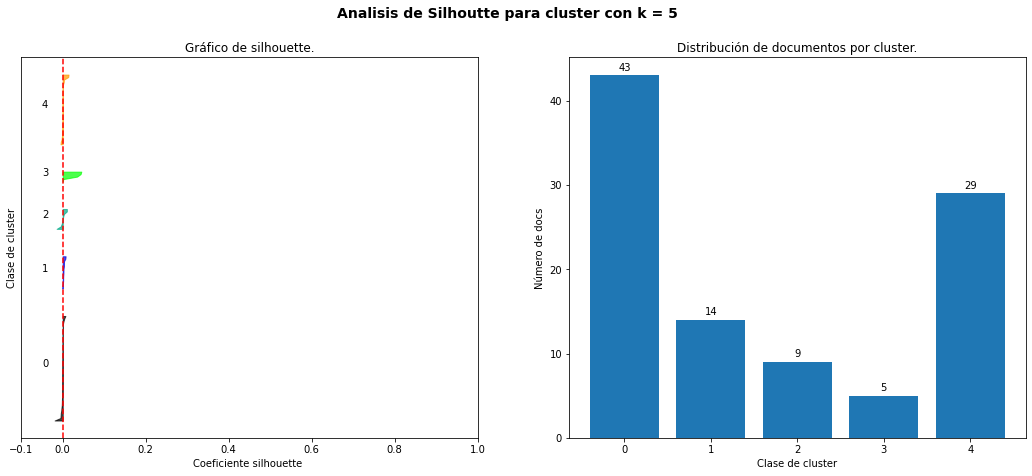

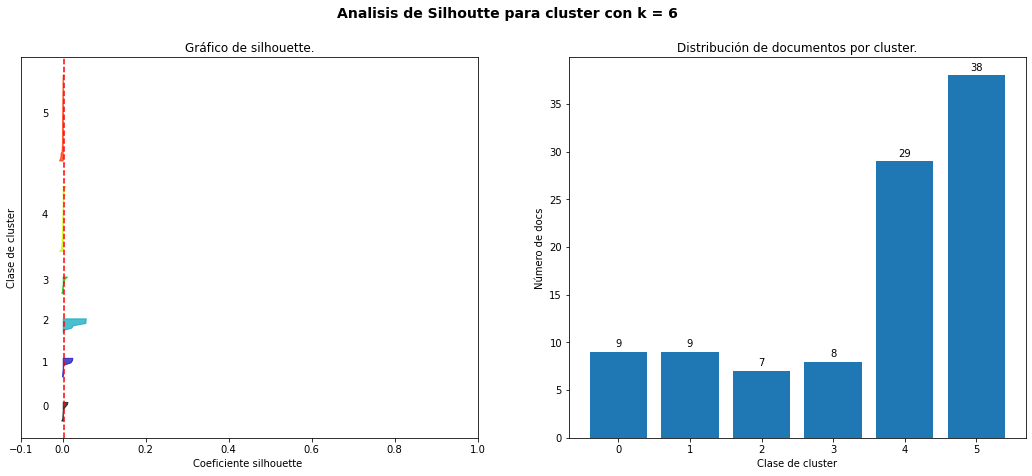

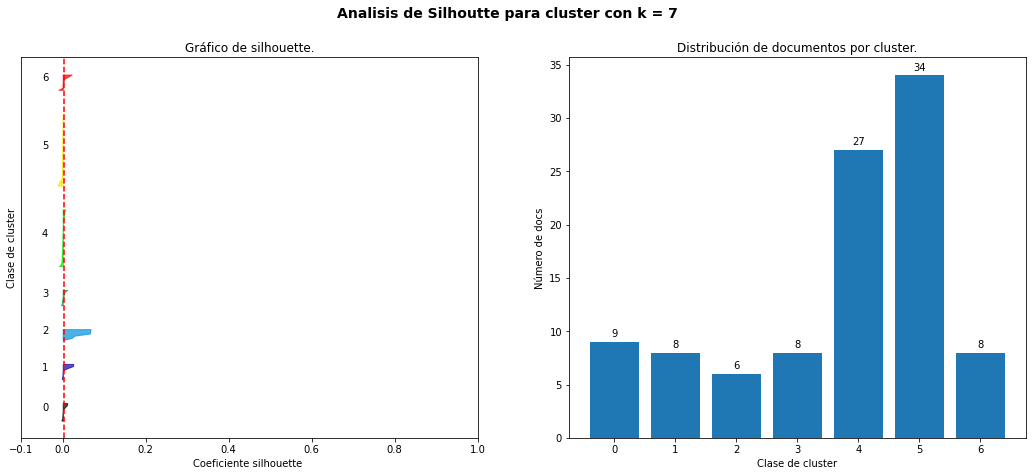

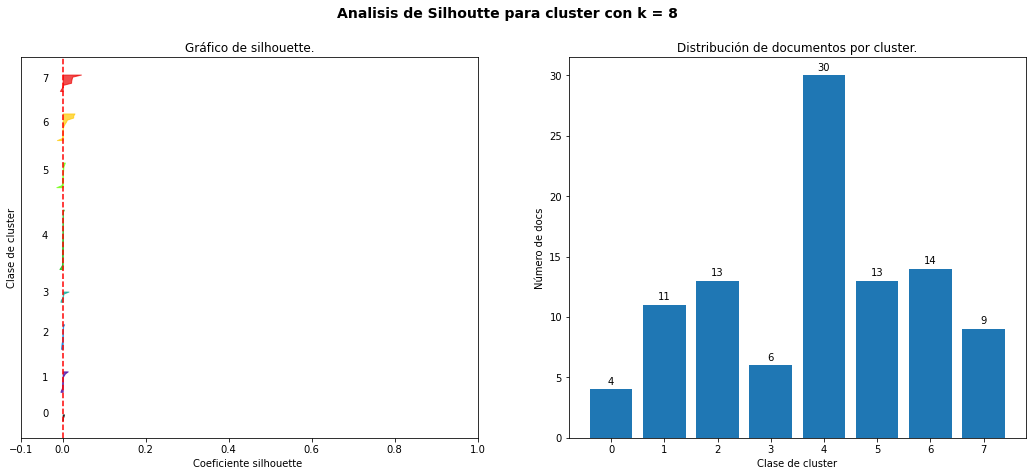

In [ ]:
# Inserte su código aquí
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

range_n_clusters = range(4,9)
sil_array = []
for n_clusters in range_n_clusters:
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    # Cluster
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # Calculo del silhouette_score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"Para k= {n_clusters}, silhouette_score: {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("Gráfico de silhouette.")
    ax1.set_xlabel("Coeficiente silhouette ")
    ax1.set_ylabel("Clase de cluster")

    # Línea vertical del valor promedio
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    sil_array.append(silhouette_avg)

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
    labels = range(n_clusters)
    label_count = [0] * n_clusters
    for label in cluster_labels:
      label_count[label] += 1
    rects = ax2.bar(labels,label_count)
    autolabel(rects, ax2)

    ax2.set_title("Distribución de documentos por cluster.")
    ax2.set_xlabel("Clase de cluster")
    ax2.set_ylabel("Número de docs")

    plt.xticks(labels)
    plt.suptitle(f"Analisis de Silhoutte para cluster con k = {n_clusters}",
                 fontsize=14, fontweight='bold')


plt.show()


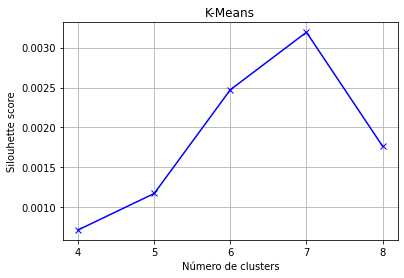

In [ ]:
# Seleccionamos el cluster con un mayor silhouette
plt.plot(range_n_clusters, sil_array,'bx-')
plt.xticks(range_n_clusters)
plt.xlabel('Número de clusters')
plt.ylabel('Silouhette score')
plt.grid()
plt.title('K-Means')
plt.show()

Muestre un WordCloud con los términos más representativos por cluster. ¿Existe alguna relación entre los clusters encontrados y el ranking de las películas?, e.g. el cluster $c_i$ está formado por películas con mas alto ranking que el cluster $c_j$

Cluster: 0
Elementos: 60
Ranking promedio: 52.583333333333336
Rankings: [0, 1, 5, 6, 7, 8, 9, 11, 14, 16, 18, 19, 20, 21, 26, 28, 30, 33, 35, 37, 39, 40, 41, 42, 44, 46, 48, 51, 52, 54, 56, 59, 61, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 77, 80, 83, 85, 87, 88, 90, 91, 92, 93, 95, 96, 97, 98, 99]


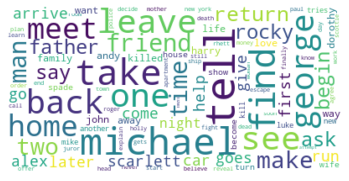

Cluster: 1
Elementos: 19
Ranking promedio: 42.26315789473684
Rankings: [2, 4, 10, 17, 29, 31, 32, 34, 36, 38, 47, 50, 55, 57, 58, 62, 78, 81, 82]


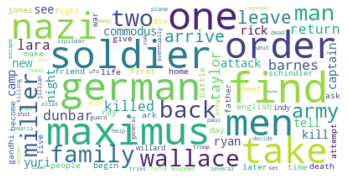

Cluster: 2
Elementos: 15
Ranking promedio: 50.733333333333334
Rankings: [3, 12, 13, 22, 23, 24, 49, 53, 60, 70, 79, 84, 86, 89, 94]


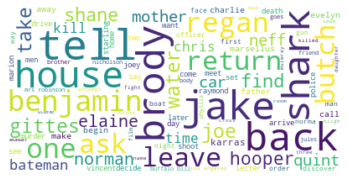

Cluster: 3
Elementos: 6
Ranking promedio: 38.5
Rankings: [15, 25, 27, 43, 45, 76]


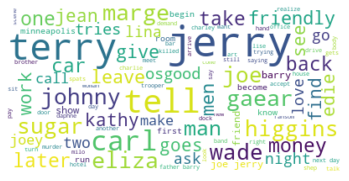

In [ ]:
# Inserte su código aquí
true_k = 4
clusterer = KMeans(n_clusters=true_k, random_state=10)
cluster_labels = clusterer.fit_predict(X)
# print(cluster_labels)

labels=clusterer.labels_
genres_cl=pd.DataFrame(list(zip(enumerate(titles),labels)),columns=['ranking','cluster'])
result={'cluster':cluster_labels,'synopses':synopses}
result=pd.DataFrame(result)

for k in range(0,true_k):
    s=result[result.cluster==k]
    # print(s['synopses'].str.cat(sep=' '))
    text=s['synopses'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    print('Cluster: {}'.format(k))
    print(f'Elementos: {len(s)}')
    rankings = s.index.values.tolist()
    mean_rank = sum(rankings)/len(s)
    print(f'Ranking promedio: {mean_rank}')
    print(f'Rankings: {rankings}')
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


No existe ninguna relación entre los disintos clusters y el ranking de una película, los valores promedio de cada uno de los clusters rondea ~50.

Utilice un método como `t-sne`, `PCA`, o `ISOMAP` para realizar una transformación de datos a 2 dimensiones del dataset original. De esta manera, muestre en un espacio bi-dimensional los documentos del dataset, cada uno con un color que represente al cluster al que pertenece.

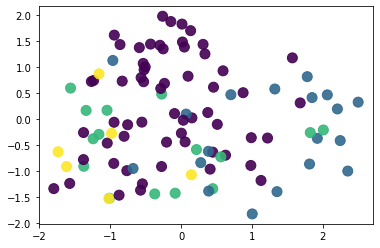

In [ ]:
# Inserte su código aquí
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import Isomap

embedding = Isomap(n_components=2)
X_transformed = embedding.fit_transform(X)

colors = labels.astype(float)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], s=100, alpha=0.9, c=colors)

El siguiente código, calcula la matriz de similaridad de documentos basados en la distancia del coseno. El código a continuación asume que la variable que contiene la representación de la matriz TFIDF se llama `matriz_TFIDF`.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

similarity_distance = 1 - cosine_similarity(X)

Utilice esta matriz para realizar un nuevo clustering, esta vez usando `hierarchical clustering`. Muestre el dendograma resultante, seleccione la mejor partición de clusters en base a la métrica del `silhouette score`, y muestre el WordCloud de los clusters resultantes. ¿Los resultados son similares al ejercicio utilizando KMeans? elabore su respuesta.

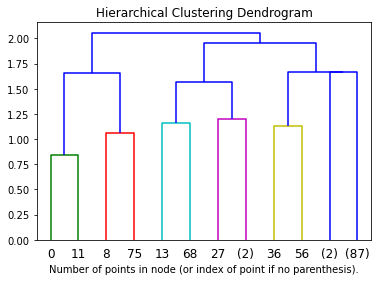

In [ ]:
# Inserte su código aquí
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering


def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

y_predict = model.fit_predict(similarity_distance)
plt.title('Hierarchical Clustering Dendrogram')
plot_dendrogram(model, truncate_mode='level',p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

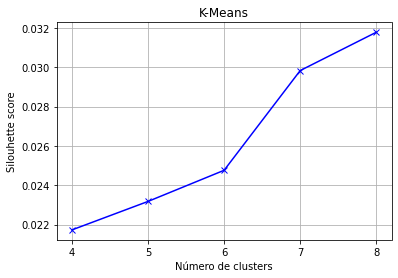

In [ ]:
k_range = range(4,9)

silhouette_scores = []

for k in k_range:
  model = AgglomerativeClustering(distance_threshold=None, n_clusters=k)
  y_predict = model.fit_predict(similarity_distance)
  silhouette_avg = silhouette_score(similarity_distance, y_predict)
  silhouette_scores.append(silhouette_avg)

# Seleccionamos el cluster con un mayor silhouette
plt.plot(k_range, silhouette_scores,'bx-')
plt.xticks(k_range)
plt.xlabel('Número de clusters')
plt.ylabel('Silouhette score')
plt.grid()
plt.title('K-Means')
plt.show()

Cluster: 0
Elementos: 83
Ranking promedio: 50.674698795180724
Rankings: [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


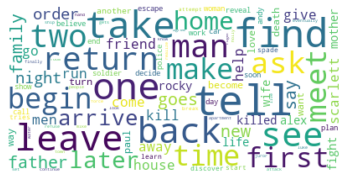

Cluster: 1
Elementos: 2
Ranking promedio: 69.0
Rankings: [52, 86]


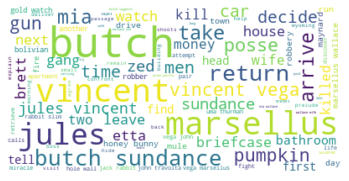

Cluster: 2
Elementos: 5
Ranking promedio: 45.4
Rankings: [13, 27, 43, 68, 76]


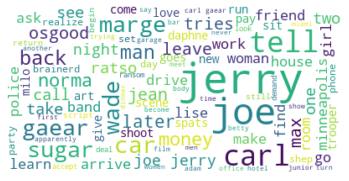

Cluster: 3
Elementos: 2
Ranking promedio: 46.0
Rankings: [36, 56]


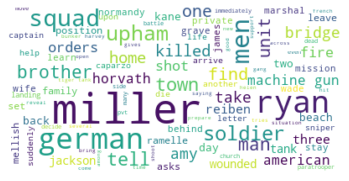

Cluster: 4
Elementos: 2
Ranking promedio: 50.0
Rankings: [15, 85]


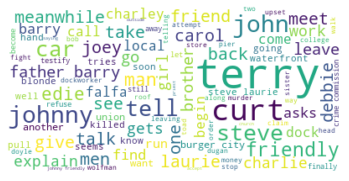

Cluster: 5
Elementos: 2
Ranking promedio: 46.5
Rankings: [26, 67]


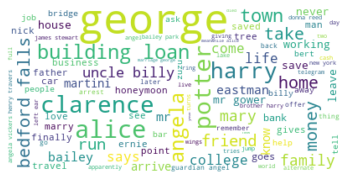

Cluster: 6
Elementos: 2
Ranking promedio: 5.5
Rankings: [0, 11]


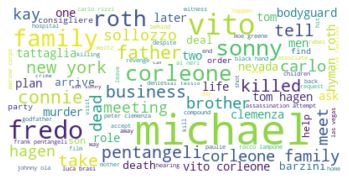

Cluster: 7
Elementos: 2
Ranking promedio: 41.5
Rankings: [8, 75]


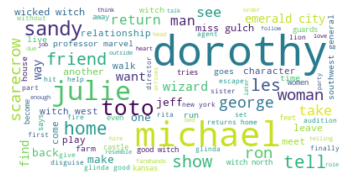

In [ ]:
# Inserte su código aquí
true_k = 8
model = AgglomerativeClustering(distance_threshold=None, n_clusters=true_k)
cluster_labels = model.fit_predict(similarity_distance)

labels=clusterer.labels_
genres_cl=pd.DataFrame(list(zip(enumerate(titles),labels)),columns=['ranking','cluster'])
result={'cluster':cluster_labels,'synopses':synopses}
result=pd.DataFrame(result)

for k in range(true_k):
    s=result[result.cluster==k]
    # print(s['synopses'].str.cat(sep=' '))
    text=s['synopses'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    print('Cluster: {}'.format(k))
    print(f'Elementos: {len(s)}')
    rankings = s.index.values.tolist()
    mean_rank = sum(rankings)/len(s)
    print(f'Ranking promedio: {mean_rank}')
    print(f'Rankings: {rankings}')
    # print(f'Rankings: {rankings}')
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()

**¿Los resultados son similares al ejercicio utilizando KMeans?**

A pesar de que el número de clusters sugerido por el análisis del Silouhette score es mayor en este caso. Los resultados siguen siendo muy parecidos en donde uno de los clusters agrupa la mayoria de los elementos y a simple vista no se puede apreciar categorías o géneros para todos los clusters.

Se puede observar que ambos métodos generan un cluster que se podría interpretar su clase como "guerra" (Cluster 1 en KMeans y cluster 3 en HierarchicalClustering).

En ambos los otros cluters generados no son lo sufientemente informativos como para poder generalizar una descripción o entregar una categoría general.

**Recomendaciones para un mejor resultado**
Los resultados de los clusteres realizados no los consideramos lo suficientemte informativos y creemos que es necesario realizar un nuevo preprocesamiento de los datos para poder eliminar ruido. 

En los WordClouds se pueden apreciar muchos normbres propios de actores o personajes. Estos se al ser muy utilizados podrían llegar a considerarse features importantes al momento del clustering, pero a la hora de analizar no proporcionan ningun tipo de información sobre el género, ranking u otra información de la película.


## Ejercicio 3

Siguiendo un proceso similar al ejercicio anterior, pero esta vez utilizando las técnicas de `OPTICS` y `DBSCAN`, encuentre automáticamente las particiones de este dataset. Los métodos antes mencionados son bastante sensibles a sus hyper-parámetros; por lo tanto, modifíquelos para obtener resultados relevantes.

> **OPTICS y DBSCAN**

A continuacion se describe el proceso para realizar un clustering mediante OPTICS[1] y DBSCAN[2]. Al ser un metodo con diversos parametros como min_samples, max_epx, etc, que son sensibles, se realizo varias iteraciones hasta encontrar clusters que comuniquen algo al analista. En el caso de Optics, se obtuvo 4 clusters a diferencia de DBSCAN que se obtuvo 8 clusters. En los dos casos, los documentos se agrupan mayoritariamente al ultimo cluster, por lo cual, podemos concluir, que la data debe consolidarse, añadiendo mas ejemplos para el train y posteriormente preprocesar con las tecnicas descritas en el Ej2 o con otras complementarias.

**Fuente:**
- Scikit Editors, 2020, "sklearn.cluster.DBSCAN". Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html 
- Scikit Editors, 2020, "sklearn.cluster.OPTICS". Disponible en: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.OPTICS.html 

In [ ]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan
X1=similarity_distance
clust = OPTICS(min_samples=2, max_eps=np.inf, xi=.05, min_cluster_size=3,  algorithm='auto', leaf_size=5)
y_predict=clust.fit_predict(X1)
# y_predict
yw=set(y_predict)
y_predict=[3 if i==-1 else i for i in y_predict]


Cluster: 0
Elementos: 4
Ranking promedio: 23.5
Rankings: [0, 8, 11, 75]


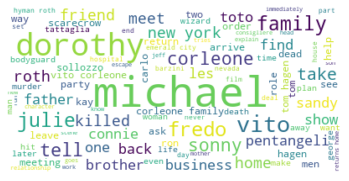

Cluster: 1
Elementos: 5
Ranking promedio: 45.4
Rankings: [13, 27, 43, 68, 76]


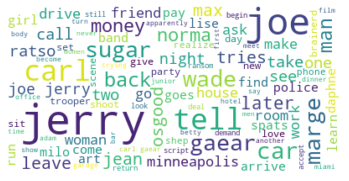

Cluster: 2
Elementos: 3
Ranking promedio: 55.333333333333336
Rankings: [9, 70, 87]


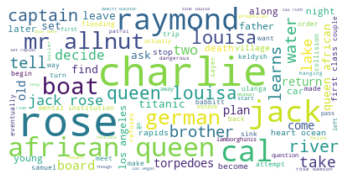

Cluster: 3
Elementos: 88
Ranking promedio: 50.71590909090909
Rankings: [1, 2, 3, 4, 5, 6, 7, 10, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 69, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


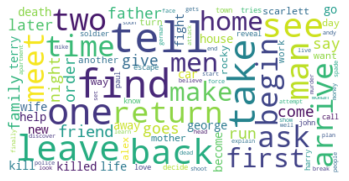

In [ ]:
import pandas as pd
from wordcloud import WordCloud

true_k = 4
labels=y_predict
genres_cl=pd.DataFrame(list(zip(enumerate(titles),labels)),columns=['ranking','cluster'])
result={'cluster':labels,'synopses':synopses}
result=pd.DataFrame(result)

for k in range(0,true_k):
    s=result[result.cluster==k]
    # print(s['synopses'].str.cat(sep=' '))
    text=s['synopses'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    print('Cluster: {}'.format(k))
    print(f'Elementos: {len(s)}')
    rankings = s.index.values.tolist()
    mean_rank = sum(rankings)/len(s)
    print(f'Ranking promedio: {mean_rank}')
    print(f'Rankings: {rankings}')
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()


**DBSCAN**



In [ ]:
from sklearn.cluster import DBSCAN
X1=similarity_distance
clustering = DBSCAN(eps=1.2, min_samples=2).fit(X1)
y_labels_dbscan=clustering.labels_
print(set(y_labels_dbscan))

{0, 1, 2, 3, 4, 5, 6, -1}


In [ ]:
print('Numero de clusters: %d' % len(set(y_labels_dbscan)))
print('Numero de puntos ruido: %d' % list(y_labels_dbscan).count(-1))
y_labels_dbscan=[7 if i==-1 else i for i in y_labels_dbscan]


Numero de clusters: 8
Numero de puntos ruido: 83


Cluster: 0
Elementos: 2
Ranking promedio: 5.5
Rankings: [0, 11]


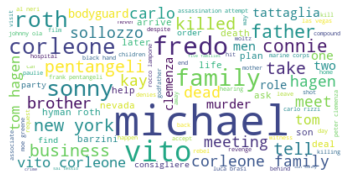

Cluster: 1
Elementos: 2
Ranking promedio: 41.5
Rankings: [8, 75]


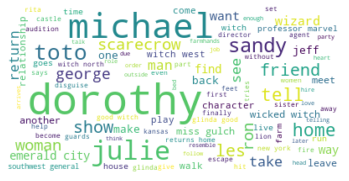

Cluster: 2
Elementos: 5
Ranking promedio: 45.4
Rankings: [13, 27, 43, 68, 76]


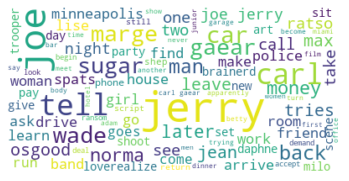

Cluster: 3
Elementos: 2
Ranking promedio: 50.0
Rankings: [15, 85]


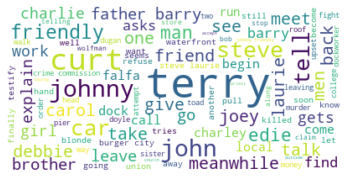

Cluster: 4
Elementos: 2
Ranking promedio: 46.5
Rankings: [26, 67]


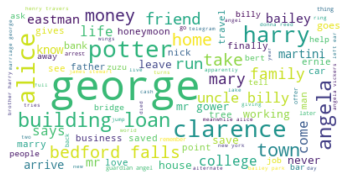

Cluster: 5
Elementos: 2
Ranking promedio: 46.0
Rankings: [36, 56]


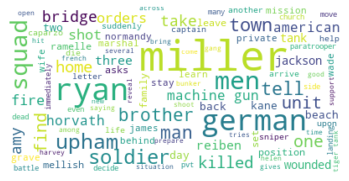

Cluster: 6
Elementos: 2
Ranking promedio: 69.0
Rankings: [52, 86]


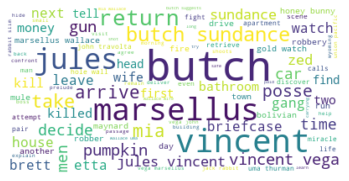

Cluster: 7
Elementos: 83
Ranking promedio: 50.674698795180724
Rankings: [1, 2, 3, 4, 5, 6, 7, 9, 10, 12, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 28, 29, 30, 31, 32, 33, 34, 35, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 69, 70, 71, 72, 73, 74, 77, 78, 79, 80, 81, 82, 83, 84, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


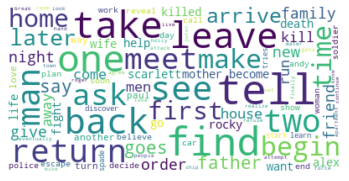

In [ ]:
import pandas as pd
from wordcloud import WordCloud

true_k = len(set(y_labels_dbscan))
labels=y_labels_dbscan
genres_cl=pd.DataFrame(list(zip(enumerate(titles),labels)),columns=['ranking','cluster'])
result={'cluster':labels,'synopses':synopses}
result=pd.DataFrame(result)

for k in range(0,true_k):
    s=result[result.cluster==k]
    # print(s['synopses'].str.cat(sep=' '))
    text=s['synopses'].str.cat(sep=' ')
    text=text.lower()
    text=' '.join([word for word in text.split()])
    wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
    
    print('Cluster: {}'.format(k))
    print(f'Elementos: {len(s)}')
    rankings = s.index.values.tolist()
    mean_rank = sum(rankings)/len(s)
    print(f'Ranking promedio: {mean_rank}')
    print(f'Rankings: {rankings}')
    
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.show()
